In [3]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import load_data
from src.model import train_model
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight


2025-08-01 23:23:12.676385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-01 23:23:12.677379: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 23:23:12.681741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 23:23:12.696820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754090592.722488    7264 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754090592.72

In [5]:
train_dir = '../data/train'
val_dir = '../data/val'
test_dir = '../data/test'
image_size = (128, 128)
batch_size = 32

In [6]:
train_gen, val_gen, test_gen, class_indices = load_data(train_dir, val_dir, test_dir, image_size, batch_size)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weight_dict = dict(enumerate(class_weights))

<function matplotlib.pyplot.show(close=None, block=None)>

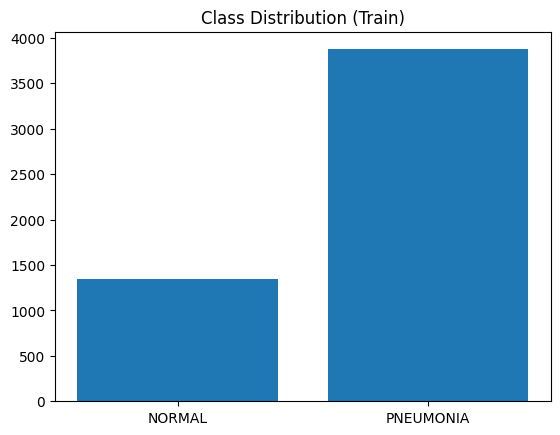

In [8]:
labels = list(class_indices.keys())
counts = [train_gen.labels.tolist().count(i) for i in range(len(labels))]
plt.bar(labels, counts)
plt.title("Class Distribution (Train)")
plt.show

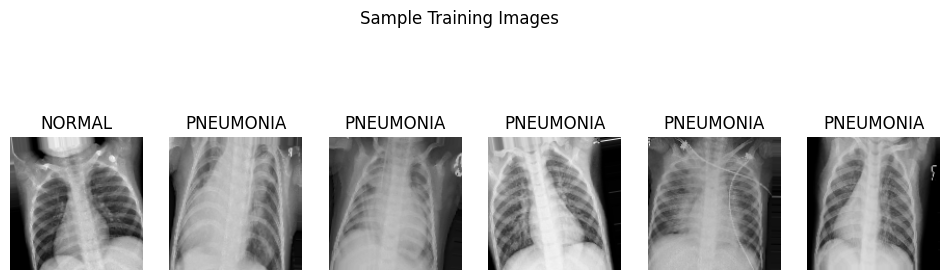

In [9]:
x, y = next(train_gen)
plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x[i])
    plt.title(labels[np.argmax(y[i])])
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

In [10]:
input_shape = (128, 128, 3)
num_classes = len(class_indices)

model, history = train_model(train_gen, val_gen, input_shape, num_classes, class_weight=class_weight_dict)

/home/omar/ALU/ml-pipeline/plant_disease_classifier/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-01 23:23:19.133470: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/omar/ALU/ml-pipeline/plant_disease_classifier/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.7684 - auc: 0.8239 - loss: 2.0893 - precision: 0.7684 - recall: 0.7684
Epoch 1: val_loss improved from inf to 56.55842, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 729ms/step - accuracy: 0.7686 - auc: 0.8243 - loss: 2.0820 - precision: 0.7686 - recall: 0.7686 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 56.5584 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.8306 - auc: 0.9256 - loss: 0.3767 - precision: 0.8306 - recall: 0.8306
Epoch 2: val_loss improved from 56.55842 to 15.33203, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 728ms/step - accuracy: 0.8306 - auc: 0.9256 - loss: 0.3766 - precision: 0.8306 - recall: 0.8306 - val_accuracy: 0.5000 - val_auc: 0.5625 - val_loss: 15.3320 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.8670 - auc: 0.9591 - loss: 0.2506 - precision: 0.8670 - recall: 0.8670
Epoch 3: val_loss improved from 15.33203 to 5.54145, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 745ms/step - accuracy: 0.8670 - auc: 0.9591 - loss: 0.2507 - precision: 0.8670 - recall: 0.8670 - val_accuracy: 0.6250 - val_auc: 0.6172 - val_loss: 5.5414 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.8836 - auc: 0.9648 - loss: 0.2444 - precision: 0.8836 - recall: 0.8836
Epoch 4: val_loss did not improve from 5.54145
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 816ms/step - accuracy: 0.8837 - auc: 0.9648 - loss: 0.2445 - precision: 0.8837 - recall: 0.8837 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 35.6346 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.9160 - auc: 0.9760 - loss: 0.1993 - precision: 0.9160 - recall: 0.9160
Epoch 5: val_loss improved from 5.54145 to 1.73986, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 846ms/step - accuracy: 0.9160 - auc: 0.9760 - loss: 0.1993 - precision: 0.9160 - recall: 0.9160 - val_accuracy: 0.5000 - val_auc: 0.6953 - val_loss: 1.7399 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.9074 - auc: 0.9764 - loss: 0.1945 - precision: 0.9074 - recall: 0.9074
Epoch 6: val_loss did not improve from 1.73986
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 849ms/step - accuracy: 0.9075 - auc: 0.9764 - loss: 0.1946 - precision: 0.9075 - recall: 0.9075 - val_accuracy: 0.5625 - val_auc: 0.5664 - val_loss: 5.2239 - val_precision: 0.5625 - val_recall: 0.5625
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.9213 - auc: 0.9779 - loss: 0.1844 - precision: 0.9213 - recall: 0.9213
Epoch 7: val_loss did not improve from 1.73986
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 819ms/step - accuracy: 0.9213 - auc: 0.9779 - loss: 0.1844 - precision: 0.9213 - recall: 0.9213 - val_accuracy: 0.5625 - val

163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 792ms/step - accuracy: 0.9268 - auc: 0.9770 - loss: 0.2172 - precision: 0.9268 - recall: 0.9268 - val_accuracy: 0.6250 - val_auc: 0.7539 - val_loss: 0.9528 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.9309 - auc: 0.9787 - loss: 0.1952 - precision: 0.9309 - recall: 0.9309
Epoch 9: val_loss improved from 0.95283 to 0.30078, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 771ms/step - accuracy: 0.9309 - auc: 0.9787 - loss: 0.1951 - precision: 0.9309 - recall: 0.9309 - val_accuracy: 0.8750 - val_auc: 0.9297 - val_loss: 0.3008 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.9339 - auc: 0.9858 - loss: 0.1610 - precision: 0.9339 - recall: 0.9339
Epoch 10: val_loss did not improve from 0.30078
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 779ms/step - accuracy: 0.9339 - auc: 0.9858 - loss: 0.1610 - precision: 0.9339 - recall: 0.9339 - val_accuracy: 0.6250 - val_auc: 0.6797 - val_loss: 1.0372 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.9307 - auc: 0.9832 - loss: 0.1815 - precision: 0.9307 - recall: 0.9307
Epoch 11: val_loss did not improve from 0.30078
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 781ms/step - accuracy: 0.9307 - auc: 0.9832 - loss: 0.1815 - precision: 0.9307 - recall: 0.9307 - val_accuracy: 0.5625 -

In [11]:
y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_labels = np.argmax(y_pred, axis=1)

624/624 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step


In [12]:
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.84      0.79      0.81       234
   PNEUMONIA       0.88      0.91      0.89       390

    accuracy                           0.87       624
   macro avg       0.86      0.85      0.85       624
weighted avg       0.86      0.87      0.86       624



93.04064512252808